# Reflect Tables into SQLAlchemy ORM

In [2]:
# Import SQLAlchemy `automap` and other dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, text

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Downloads/hawaii.sqlite")

In [6]:
# Create the inspector and connect it to the engine

# INSPECT
inspector_gadget = inspect(engine)

# get all tables
table_names = inspector_gadget.get_table_names()
for table in table_names:
    print(table)
    
    # get columns for table
    for column in inspector_gadget.get_columns(table):
        print(column)
        
    print()

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}

station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoi

In [7]:
query = text("""
                SELECT
                    *
                FROM
                    measurement
                limit 10
            """)

pd.read_sql(query, engine)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [8]:
query = text("""
                SELECT
                    *
                FROM
                   station
                limit 10
            """)

pd.read_sql(query, engine)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [9]:
#Finding the previous month
query = text("""
                SELECT
                    *
                FROM
                    measurement
                order by
                    date desc
                limit 1
            """)

pd.read_sql(query, engine)

,id,station,date,prcp,tobs
0,2724,USC00519397,2017-08-23,0.0,81.0


In [10]:
query = text("""
                SELECT
                    date,
                    station,
                    prcp
                FROM
                    measurement
               WHERE
                   date >= '2016-08-23';
            """)

df = pd.read_sql(query, engine)
df.head()

,date,station,prcp
0,2016-08-23,USC00519397,0.00
1,2016-08-24,USC00519397,0.08
2,2016-08-25,USC00519397,0.08
3,2016-08-26,USC00519397,0.00
4,2016-08-27,USC00519397,0.00


In [11]:
df["date"] = pd.to_datetime(df["date"])

In [12]:
df1 = df.dropna().sort_values(by="date", ascending = True).reset_index(drop = True)
df1.head(10)

,date,station,prcp
0,2016-08-23,USC00519397,0.00
1,2016-08-23,USC00519523,0.02
2,2016-08-23,USC00514830,0.05
3,2016-08-23,USC00516128,0.70
4,2016-08-23,USC00513117,0.15
5,2016-08-23,USC00519281,1.79
6,2016-08-24,USC00519523,1.22
7,2016-08-24,USC00519397,0.08
8,2016-08-24,USC00519281,2.15
9,2016-08-24,USC00513117,2.15


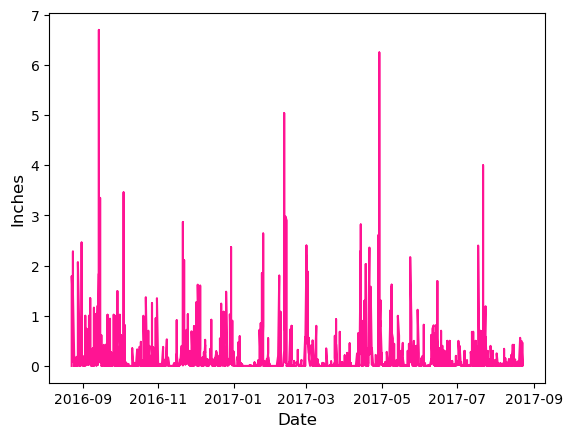

In [14]:
plt.plot(df1.date, df1.prcp,color = "deeppink")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Inches", fontsize=12)
plt.show()

In [16]:
query = text("""
                SELECT
                    station,
                    count(*) as num_obs
                FROM
                    measurement
                group by
                    station
                order by
                    num_obs desc;
               
            """)
pd.read_sql(query, engine)

,station,num_obs
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [17]:
query = text("""
                SELECT
                    station,
                    min(prcp),
                    avg(prcp),
                    max(prcp)
                FROM
                    measurement
               WHERE
                    station = 'USC00519281' ;
               
            """)
pd.read_sql(query, engine)

,station,min(prcp),avg(prcp),max(prcp)
0,USC00519281,0.0,0.212352,9.64


In [18]:
query = text("""
                SELECT
                    date,
                    station,
                    tobs
                FROM
                    measurement
               WHERE
                   date >= '2016-08-23'
                   and station = 'USC00519281'
            """)

df2 = pd.read_sql(query, engine)
df2.head()

,date,station,tobs
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


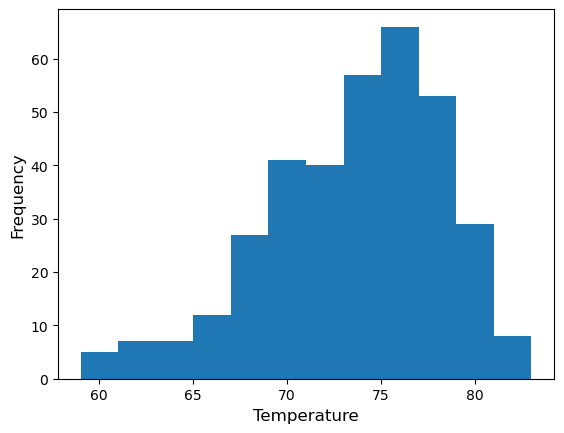

In [20]:
plt.hist(df2.tobs, bins = 12)
plt.xlabel("Temperature", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [5]:
# reflect an existing database into a new model

# reflect the tables


In [6]:
# View all of the classes that automap found


['measurement', 'station']

In [7]:
# Save references to each table


In [8]:
# Create our session (link) from Python to the DB


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.


('2017-08-23',)

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

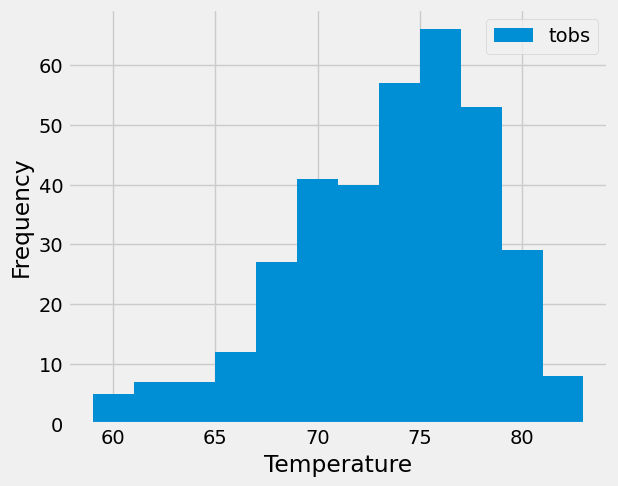

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()